In [7]:
import os, sys
sys.path.append('vis_poly')
sys.path.append('profiles')
import cosmo_poly

In [8]:
import argparse
parser = argparse.ArgumentParser(description='Generate a cosmo surface polygon from a COSMO file')
parser.add_argument('--inpath', type=str, required=True, nargs=1, help='The path to the cosmo file that is to be processed')
parser.add_argument('--outpath', type=str, required=True, nargs=1, help='Filetype: ply, .stl, xyz, .pcd, .obj, .off, .gltf. The path to the output of the cosmo surface profile that is to be generated')
parser.add_argument('--target', type=str, required=True, nargs=1, help='specifysurf or atom. surf: cosmo surface, atom: atom positions')

# for testing
arg_str = '--target surf'\
         ' --inpath profiles/GAMESS_TEST/ETHANOL.gout'\
         ' --outpath GAMESS_ETHANOL_COSMO.ply'
args = parser.parse_args(arg_str.split(' '))    

cosmo = cosmo_poly.CosmoView.read(args.inpath[0])
cosmo.save(outpath=args.outpath[0], target = args.target[0])

GAMESS ATOM


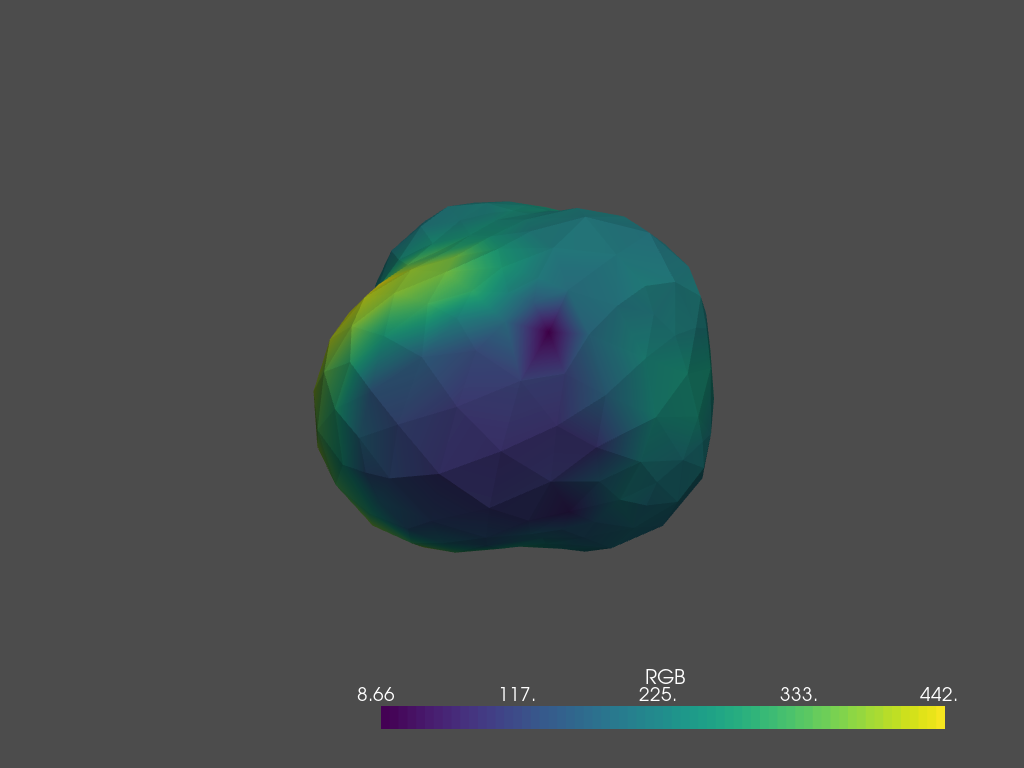

In [9]:
# image 
import pyvista as pv
if os.path.isfile(args.outpath[0]):
    mesh = pv.read(args.outpath[0])
    mesh = mesh.smooth(n_iter=100)
    cpos = mesh.plot()